In [2]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
h = np.dot(c, W)
print(h)


[[-0.79504775 -0.4188644  -0.38590936]]


In [3]:
import sys

sys.path.append("..")
import numpy as np
from common.layers import MatMul


c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)


[[-0.48169985  0.8799796   0.51530155]]


In [12]:
# sayの両脇である、youとgoodbyeをc0,c1として入力にする
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 入力層から中間層の重み
W_in = np.random.rand(7, 3)
# 中間層から出力層の重み
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
print(f"h0={h0}")
h1 = in_layer1.forward(c1)
print(f"h1={h1}")
h = 0.5 * (h0 + h1)
print(f"h={h}")
s = out_layer.forward(h)

print(f"score={s}")


h0=[[0.22087112 0.99746202 0.54974323]]
h1=[[0.71376264 0.77843647 0.71845716]]
h=[[0.46731688 0.88794925 0.63410019]]
score=[[ 0.81796454 -0.06297395  0.2433557  -0.37381633  0.70443563 -0.5752889
   1.36582698]]


In [22]:
# text = "You say goodbye and I say hello."
# andの両脇2単語ずつ入力にする。
c0 = np.array([[0, 0, 1, 0, 0, 0, 0]])# goodbye
c1 = np.array([[0, 1, 0, 0, 0, 0, 0]])# say
c2 = np.array([[0, 0, 0, 0, 1, 0, 0]])# I
c3 = np.array([[0, 1, 0, 0, 0, 0, 0]])# say

# 入力層から中間層の重み
W_in = np.random.rand(7, 3)
# 中間層から出力層の重み
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
in_layer2 = MatMul(W_in)
in_layer3 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
print(f"h0={h0}")
h1 = in_layer1.forward(c1)
print(f"h1={h1}")
h2 = in_layer2.forward(c2)
print(f"h2={h2}")
h3 = in_layer3.forward(c3)
print(f"h3={h3}")
h = 0.5 * (h0 + h1+h2+h3)
print(f"h={h}")
s = out_layer.forward(h)

print(f"score={s}")

h0=[[0.99901187 0.08218996 0.27983095]]
h1=[[0.80218558 0.12738162 0.48859413]]
h2=[[0.35690885 0.97663113 0.82210741]]
h3=[[0.80218558 0.12738162 0.48859413]]
h=[[1.48014594 0.65679216 1.03956331]]
score=[[-0.46031823  1.07189934  1.37495282  1.21670759  1.73007826  1.25614125
  -1.69565005]]


In [21]:
import sys

sys.path.append("..")
from common.util import preprocess

# コーパスの作成
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)


[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [6]:
# コンテキストとターゲットを作成


def create_context_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    context = []

    for idx in range(window_size, len(corpus) - window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        context.append(cs)

    return np.array(context), np.array(target)


contexts, target = create_context_target(corpus)
print(contexts)
print(target)
print(contexts.shape)


[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]
(6, 2)


In [18]:
import sys

sys.path.append("..")
from common.util import preprocess, create_contexts_target, convert_one_hot

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=2)
vocab_size = len(word_to_id)
print(vocab_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(contexts)


7
[[[1 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]
  [0 0 0 0 0 1 0]]

 [[0 0 0 1 0 0 0]
  [0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]
  [0 0 0 0 0 0 1]]]


In [8]:
def convert_one_hot(corpus, vocab_size):
    """one-hot表現への変換

    :param corpus: 単語IDのリスト（1次元もしくは2次元のNumPy配列）
    :param vocab_size: 語彙数
    :return: one-hot表現（2次元もしくは3次元のNumPy配列）
    """
    N = corpus.shape[0]

    if corpus.ndim == 1:
        # corpusがターゲットの場合、ここの処理
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        # corpusがコンテキストの場合、ここの処理
        # 列数を取得
        C = corpus.shape[1]
        # one_hot表現は(元配列の行数,元配列の列数,単語数)という形状
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=1)
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(contexts)


[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


In [9]:
import sys

sys.path.append("..")
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size
        # 重みの初期化
        W_in = 0.01 * np.random.randn(V, H).astype("f")
        W_out = 0.01 * np.random.randn(V, H).astype("f")

        # レイヤーの生成
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # メンバ変数に単語の分散表現を設定
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *=0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None


| epoch 1 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 12 |  iter 1 / 1 | time 0[s] | loss 1.95
| epoch 13 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 1 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 1 | ti

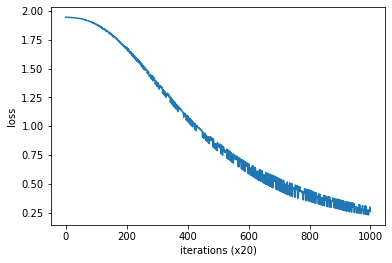

In [19]:
import sys
sys.path.append("..")
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

windows_size=1
hidden_size=5
batch_size=3
max_epoch=1000

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size=len(word_to_id)
contexts, target = create_contexts_target(corpus, windows_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [20]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-0.8929052 -1.1233    -0.8559727  1.0832299 -0.8716577]
say [-0.93898493  0.11342975 -1.0387012   0.05034456 -1.1144909 ]
goodbye [-1.1558061   1.048789   -0.6945378  -1.0610789   0.29390728]
and [ 0.05043728  0.90060323  1.1086389  -0.92043066  1.0636796 ]
i [ 1.1716214  0.7823294  1.0138525 -0.7714733  0.8078269]
hello [ 0.00813904  0.00384766  0.0007998   0.01606048 -0.02832432]
. [ 0.02641985  0.00478541 -0.00111027 -0.00679206  0.01446429]


In [16]:
a = np.array([[1,2],[3,4]])
print(a)
a[...]=0
print(a)
a = 0
print(a)

[[1 2]
 [3 4]]
[[0 0]
 [0 0]]
0
